In [1]:
import chardet
import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
# Constants:
FILEPATH = 'RNAMonitoring_Public - Result Description - N1 Gene, Reported Value - N1 Gene (gc-l), Days Since.csv'

In [3]:
# Determine the encoding of the input file:
with open(FILEPATH, 'rb') as data:
    chardet_result = chardet.detect(data.read())

In [4]:
# Read the data:
df = pd.read_csv(FILEPATH, encoding=chardet_result['encoding'], sep='\t')

In [5]:
# Column names:
HEALTH_AREA = 'Health Area'
SITE_NAME = 'Site Name'
POPULATION = 'Population'
DATE = 'Date'
VALUE = 'Reported Value - N1 Gene (gc/l)'
VALUE_PER_1000 = 'Reported Value - N1 Gene per 1000 People (gc/l)'

# Column values:
SITE_NAMES = df[SITE_NAME].unique()
HEALTH_AREA_GGC = 'Greater Glasgow and Clyde'

# Outliers - number of standard deviations:
OUTLIER_STD_DEV = 3

In [6]:
# Check that each sample was taken on a different date:
for site_name in SITE_NAMES:
    assert df[df[SITE_NAME] == site_name][DATE].is_unique

In [7]:
# Remove outliers:
df = df[np.abs(stats.zscore(df[VALUE])) < OUTLIER_STD_DEV]

In [8]:
# Remove samples without specified population:
df = df[df[POPULATION] != '(Empty)']

In [9]:
# Convert the date:
def parse_datetime(date):
    if not isinstance(date, datetime.datetime):
        month, day, year = map(int, date.split("/"))
        return datetime.datetime(year, month, day)
    else:
        return date

# Create a datetime index:
df[DATE] = pd.DatetimeIndex(df[DATE].map(parse_datetime))

In [10]:
# Add value per person:
df[VALUE_PER_1000] = df[VALUE] / (df[POPULATION].astype(float) / 1000)

/var/folders/_x/w0zj8vfx06zdrpnnf602tgwh0000gp/T/ipykernel_47395/1109876850.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  _ = df.groupby(SITE_NAME).apply(lambda df_sn: df_sn.set_index(DATE)[VALUE_PER_1000].plot())


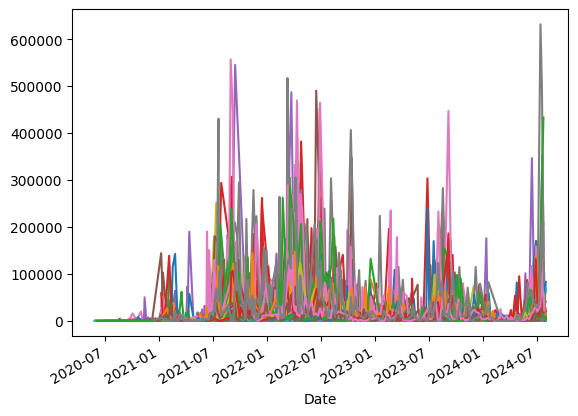

In [11]:
_ = df.groupby(SITE_NAME).apply(lambda df_sn: df_sn.set_index(DATE)[VALUE_PER_1000].plot())